<a href="https://colab.research.google.com/github/whyranox3/Hacksa/blob/master/TrOCRtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#토큰나이저 설치
!pip install sentencepiece
#데이터 직렬화 util 설치
!pip install protobuf
#Hugging face 의 trasnformer 설치
!pip install transformers

In [2]:
# 예제 이미지 다운로드
!rm -rf ocr_test_image
!mkdir ocr_test_image
#!cd ocr_test_image && wget https://fki.tic.heia-fr.ch/static/img/a01-122-02.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/a01-122-02.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/Hello.jpg
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/test_01.png
!cd ocr_test_image && wget https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/test_02.png

--2025-04-08 10:56:26--  https://github.com/jskimn/aiservice_lesson/raw/main/001_ocr/a01-122-02.jpg
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/001_ocr/a01-122-02.jpg [following]
--2025-04-08 10:56:26--  https://raw.githubusercontent.com/jskimn/aiservice_lesson/main/001_ocr/a01-122-02.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13376 (13K) [image/jpeg]
Saving to: ‘a01-122-02.jpg’

a01-122-02.jpg      100%[===================>]  13.06K  --.-KB/s    in 0.003s  

2025-04-08 10:56:27 (4.90 MB/s) - ‘a01-122-02.jpg’ saved [13376/13376]

--2025-04-08 10:56:27-

In [4]:
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import matplotlib.pyplot as plt

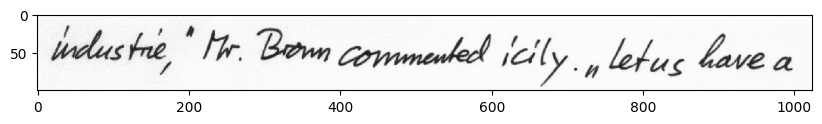

In [5]:
# Load image
image = Image.open("./ocr_test_image/a01-122-02.jpg").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

In [6]:
print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

[INFO] Load pretrained TrOCRProcessor


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

[INFO] Load pretrained VisionEncoderDecoderModel


config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [8]:
text_from_image

'industry , " Mr. Brown commented icily . " Let us have a'

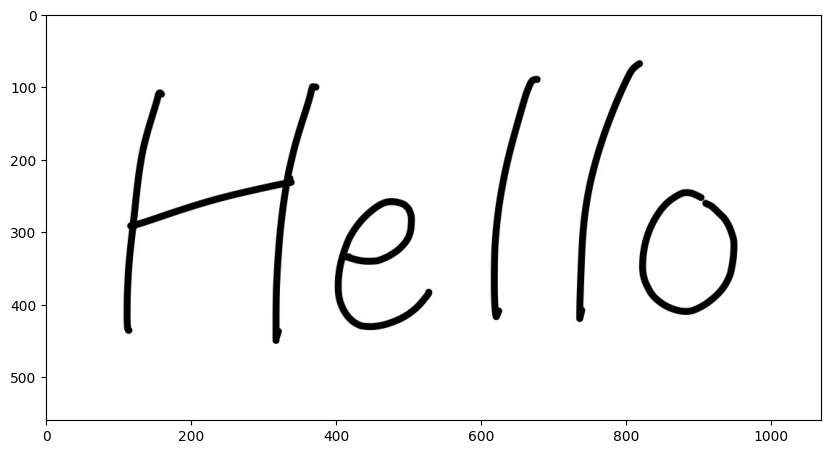

[INFO] Load pretrained TrOCRProcessor
[INFO] Load pretrained VisionEncoderDecoderModel


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [9]:
# Load image
image = Image.open("./ocr_test_image/Hello.jpg").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [10]:
text_from_image

'Hello'

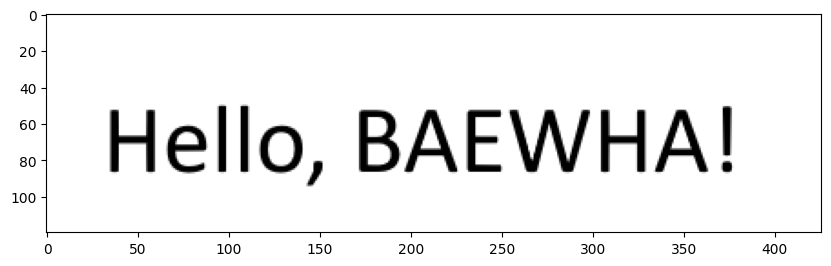

[INFO] Load pretrained TrOCRProcessor
[INFO] Load pretrained VisionEncoderDecoderModel


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [12]:
# Load image
image = Image.open("./ocr_test_image/test_01.png").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [13]:
text_from_image

'Hello , BAEWHARI'

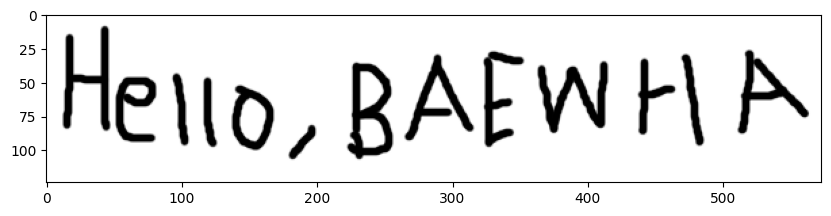

[INFO] Load pretrained TrOCRProcessor
[INFO] Load pretrained VisionEncoderDecoderModel


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [14]:
# Load image
image = Image.open("./ocr_test_image/test_02.png").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

In [15]:
text_from_image

'HE110 , BAEW H.A.'

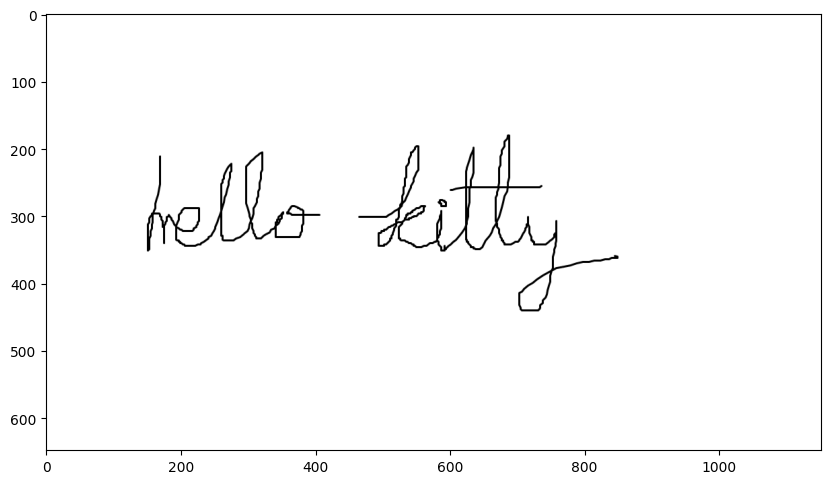

In [16]:
# Load image
image = Image.open("./ocr_test_image/testest.png").convert("RGB")

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis("on")
plt.show()

In [17]:
print("[INFO] Load pretrained TrOCRProcessor")
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
print("[INFO] Load pretrained VisionEncoderDecoderModel")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# Preprocess
pixel_values = processor(images=image, return_tensors="pt").pixel_values
# Inference
token_ids = model.generate(pixel_values)
# Postprocess
text_from_image = processor.batch_decode(token_ids, skip_special_tokens=True)[0]

[INFO] Load pretrained TrOCRProcessor
[INFO] Load pretrained VisionEncoderDecoderModel


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

In [18]:
text_from_image

'mello deity'